
# Introduction to Python Week 4:
# Reading in Data Files and Curve-fitting
### Written by Jackie Champagne; adapted by Hannah Hasson, Kassie Moczulski, and Imani West-Abdallah

Reminder: [Code of conduct](https://docs.google.com/presentation/d/1UiBbQLGCZ_8VTTufJGitjnfz2Lj12TzAPuvHLvRLMhk/edit?usp=sharing)



---





&nbsp;  

Welcome back again! So far we have covered basic syntax, arrays, if statements, for loops, functions, and plotting. Now we can start building some data analysis skills using statistics.

&nbsp;

Today we will start by learning about reading in data files. But of course, let's import numpy and matplotlib first :)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp;

##**Loading in files**

Up until now, none of the exercises have required you to load in an outside file to the notebook, but this is definitely a skill you'll need! So let's learn how to work with files in python.

&nbsp;

We will start with learning how to import a file into Colab (if you run this in Jupyter you can just skip this paragraph.) You will have to upload the file before you use it in a notebook. This is not needed if you are running python offline, but since Colab doesn't save your files, you'll have to feed it the file whenever you re-open the notebook. We can talk about more permanent ways to do this later, but for now, here's what to do:

1. <--- Click on the picture of the folder on the lefthand sidebar. You should now be in the "Files" menu.
2. Click the picture of the paper with an up arrow just under the "Files" header, and then select the file from your computer. For this lesson, I have uploaded a sample gaussian data file **"spectrum.csv"** to the drive for you to download to your computer. Upload that file here now.

&nbsp;

Now that we have our file uploaded to Colab, let's load it into python. We will use [`numpy.genfromtxt`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html?highlight=genfromtxt#numpy.genfromtxt) to read in our CSV file. Wait-- what is a CSV? It stands for **Comma-Separated Value**. So it's just a file with data points separated by commas! If you open the CSV file on your computer, that is exactly what you will see: numbers separated by commas.

&nbsp;

Here's how you import CSV files with np.genfromtxt:

    np.genfromtxt(filename, delimiter=",")


The "**delimiter**" is the character that separates each data point, which here is a comma. You can use pretty much anything as a delimiter, but commas are pretty typical. In fact, you can export data in Excel as a CSV.

&nbsp;

Let's load our file in. We have two columns of data, one for **wavelength** and the other for the **signal intensity**, so let's read each of those into their own array. We can use our **array-slicing** skills from Day 1!

In [2]:
#Load in data in original format
data_columns = np.genfromtxt("spectrum.csv", delimiter = ",")
print(data_columns.shape)

#Assign each column to a variable
wavelength = data_columns[:,0]
signal = data_columns[:,1]

(211, 2)


To unpack what just happened a bit:

1. We loaded in our file as an array to the variable "data_columns." This file has 211 rows and 2 columns (one for wavelength, one for intensity).
2. We assigned all rows (recall that `:` means all) of the first column of data to the variable "wavelength," and all rows of the second column to "signal."

We can plot this data and see what it looks like:

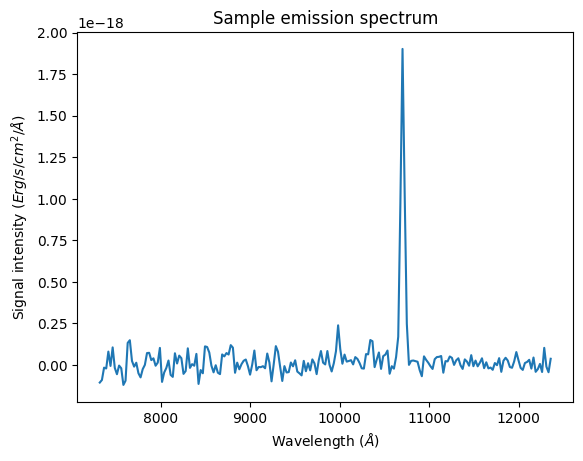

In [3]:
plt.plot(wavelength, signal)
plt.xlabel("Wavelength ($\AA$)") #the \AA command inside of $$ gives the angstrom symbol
plt.ylabel("Signal intensity ($Erg/s/cm^2/\AA$)")
plt.title("Sample emission spectrum")
plt.show()

This data actually shows light of a specific color that was emitted from some hot plasma out in space! We call this a **spectral line**.


We want to learn about the properties of this line, but how? Well, scientists like to fit their data to mathematical **models** (equations) that explain what is happening.


## **Fitting a function to data**

Let's now learn about fitting a function to data!

In research, you typically have some **data** you've collected, and then a **model** (a.k.a. some mathematical function) that you think the data should follow. There is always noise in the data because no instrument is perfect, so the model won't perfectly predict the data. As scientists, we often use a technique called [**least-squares**](https://mathworld.wolfram.com/LeastSquaresFitting.html) to minimize the difference between the plot of the model and the real data points. This makes more sense once you **see it visually**:

<p align="center">
  <img width="400" src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Least_Squares.gif">
</p>

The red dots here are the data points and the blue line is the fitted model (chosen here to be a straight line). The grey dotted lines are the difference between the data and the fit, which we want to minimize.

&nbsp;


Let's start with the simplest example of fitting a curve to some data. We can define a function for a line just as we did last time:

In [7]:
def line(x, m, b):
  y = m*x +b
  return y

&nbsp;

Let's come up with some random noisy data that we could fit a line to. I'm going to use the [np.random](https://numpy.org/doc/1.16/reference/routines.random.html) subpackage to add some noise of a certain scale to the data in order to make it not be a perfect line. I'm going to arbitrarily choose that the true line (without noise) will have a slope of 2 and an intercept of 5.

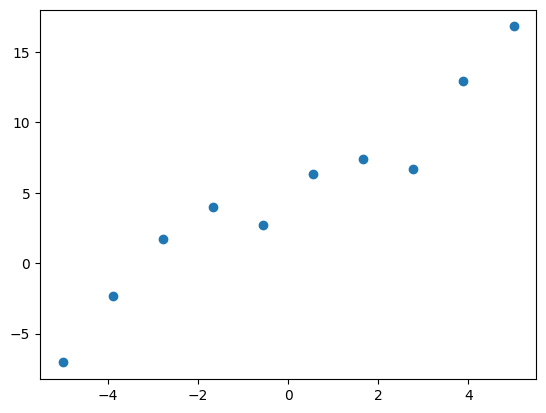

In [10]:
xvals = np.linspace(-5,5,10)

#generate random noise
rng = np.random.RandomState(108) #seed random generator so it's reproducible
noise = rng.normal(0,2,10) #extra signal generally between -2 and 2

#generate pure data
y_pure = 2*xvals + 5

#add noise to pure data
ynoise = y_pure + noise

plt.plot(xvals, ynoise,"o")
plt.show()

We can see how adding the noise impacted the data, since it definitely doesn't *look* like a straight line. In real experiments you will always have noise, so your model will never perfectly fit the data. Sometimes a bad fit comes from noise, but sometimes it also comes from *discovering something interesting!*

&nbsp;

Pretending that we don't already know what the inputs of this data are, let's try fitting a straight line to it. We will now go through to do this with opt.curve_fit. First we import the **`optimize`** subpackage from scipy. Let's import it as "opt."

In [5]:
#Import the optimize subpackage
from scipy import optimize as opt


Optimize is a subpackage of scipy with lots of nice functions for minimizing and maximizing mathematical functions. We will be using the [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function, which tries to find what values of the model's inputs that will minimize the difference between the function and your data.

&nbsp;

Here is how we call the **opt.curve_fit** function:

    bfpars, covar = opt.curve_fit(function, xdata, ydata, p0=initial_guess)

&nbsp;

This function returns the **best fit parameters** (`bfpars`) for your function variables, as well as something called the "covariance matrix" (`covar`), which we don't need to worry about for now (it gives us info on how good the fit was).

&nbsp;

The last input, **`p0`, is the initial guess** of the function's variables - this is important because a bad first guess (or lack of a first guess) of the function inputs will cause a bad fit. If you are trying to fit multiple variables in your function, you will need to provide one guess for each variable, fed to the optimizer as a list.





**NOTE: The order of the guesses in p0 has to be the same as the order of the inputs in the function!**

In [8]:
bfpars, covar =  opt.curve_fit(line, xvals, ynoise, p0=[1, 3]) #guessing m=1, b=3

print(bfpars)

[1.96615035 4.9124747 ]


`bfpars` is now an array containing the best fit parameters, in the same order as your function. So in my case, `bfpars[0]` is `m` and `bfpars[1]` is `b`.

This is telling us that the closest fit of a line to the data gives m=1.97 and b=4.91. This is reasonably close to the true values of m=2, b=5!



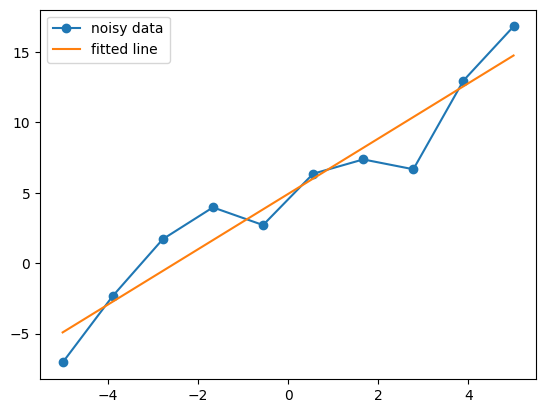

In [11]:
yfit = xvals*bfpars[0] + bfpars[1]

plt.plot(xvals, ynoise, marker="o", label="noisy data") #the blue dots
plt.plot(xvals, yfit, label="fitted line") #orange line
plt.legend()
plt.show()

Now take a few minutes to play around with the initial guess `p0` and the plotting output. You can change the color and shape of the plotted data ([`marker`](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers), [`linestyle`](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) and [`color`](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) are keywords you'd change for these).

&nbsp;
&nbsp;
-------
#PAUSE HERE AND TAKE A BREAK!
-------

&nbsp;

##**A bit of math: What is a Gaussian?**

A Gaussian (a.k.a. "bell curve") is one of the most common curves you will see in physics. The Gaussian looks like a single smooth peak, and shows up in statistical physics quite a bit. For example, emission lines in stars and other plasmas generally take this shape. A Gaussian curve looks like this:

<p align="center">
  <img width="600" src="https://drive.google.com/uc?id=1ZHaEOhkdIMjo-Y8xeyRKFm2cIIzEEoaC">

</p>

The function is:

## $f(x)=a\cdot e^\frac{-(x-x0)^2}{2w^2}$

The center of the curve is at position $x0$, and the curve has width 2$w$ and maximum height $a$.

Note that here $e$ is Euler's number ($e\sim 2.7$.) The python function for $e$ raised to some power is `np.exp(some_power)`.

&nbsp;

### Question 1: Let's use our skills from last time for defining our own functions and make a `gaussian` function with inputs `x`, `x0`, `w`, and `a` that has the form of the function above:

In [16]:
#answer here

# Be careful with your parentheses!

def gaussian(x, x0, w, a):
  y = a*np.exp(-(x-x0)**2/(2*w**2))
  return y

###Question 2: Use np.linspace to make an array of 50 datapoints from 0 to 100 called `xvals`. Then feed this array into your gaussian function in place of the `x` input. Pick whatever single values you want for `a`, `x0`, and `w`.

In [33]:
#solution here
xvals = np.linspace(0, 100, 50)
yvals = gaussian(xvals, 50, 15, 3) #Center x0=50

###Question 3: Plot this bad boy using plt.plot(). Include whatever axis labels and title you feel like adding.

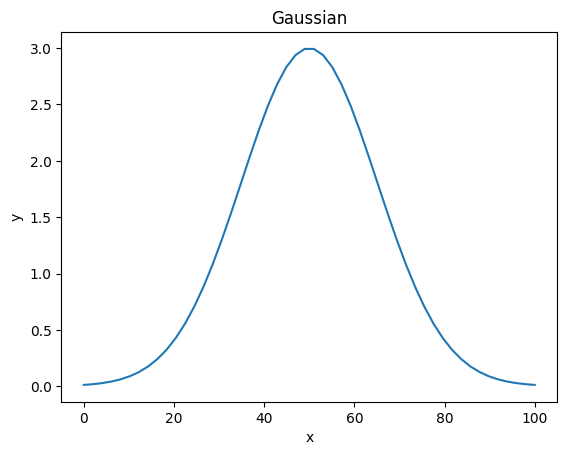

In [34]:
#solution here
plt.plot(xvals, yvals)
plt.title("Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Take a second to look at the width, height, and mean value of your plot and compare it to your inputs.


&nbsp;

Let's now try fitting our Gaussian function to the spectral data we loaded in, which looked like this:

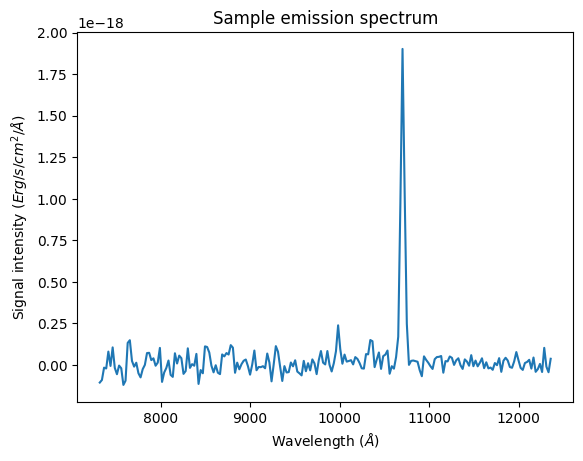

In [35]:
plt.plot(wavelength, signal)
plt.xlabel("Wavelength ($\AA$)") #the \AA command inside of $$ gives the angstrom symbol
plt.ylabel("Signal intensity ($Erg/s/cm^2/\AA$)")
plt.title("Sample emission spectrum")
plt.show()

###Question 4: Apply `opt.curve_fit` to the function "gaussian" with the data "wavelength" and "signal," and the initial guesses x0=1e4, w=100, a=2e-18. Print the bfpars that come out. Try changing the initial guess and see what happens to the output.

In [52]:
bfpars, covar =  opt.curve_fit(gaussian, wavelength, signal, p0=[1.09e4, 100, 2e-18]) #edit this

#print the results
print(bfpars)


[ 1.07037446e+04 -2.18660135e+01  1.87983512e-18]


### Question 5: Now use your `gaussian` function and your best fit parameters to plot the fitted curve with the original spectrum data! We'll break this into chunks.
#### a) First generate the points for your fitted curve: You can use the `wavelength` array for your x values. To get the y values, feed the `wavelength` array, along with your `bfpars`, into the `gaussian` function you made.

#### b) Now use the `plt.plot` function to plot the data points as you did in question 3. Make sure to include a `label` in the plot statement, as well as a color and marker shape (see end of Day 1).

#### c) Finally, plot your newly generated points for your fit. You can plot `wavelength` in x and your points from part a in y. Give this curve a good label name and choose a marker/color.

#### Add axes labels and a title, and finish off with `plt.show`!

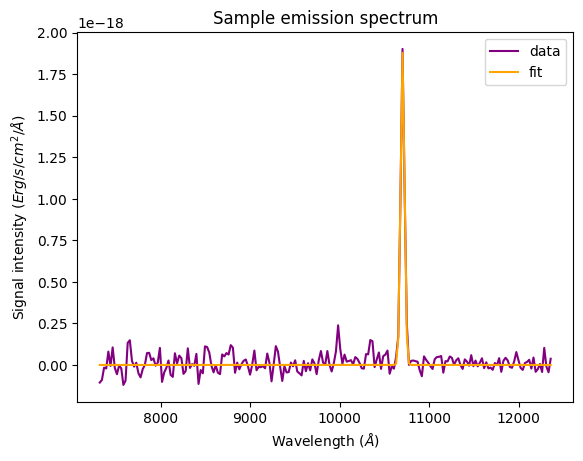

In [53]:
#answer here pls

xvalues = wavelength
yvalues = gaussian(wavelength, bfpars[0], bfpars[1], bfpars[2])

plt.plot(wavelength, signal, color="purple", label="data")
plt.xlabel("Wavelength ($\AA$)") #the \AA command inside of $$ gives the angstrom symbol
plt.ylabel("Signal intensity ($Erg/s/cm^2/\AA$)")
plt.title("Sample emission spectrum")
plt.plot(xvalues, yvalues, color="orange", label="fit")
plt.legend()
plt.show()

How well did the fit work? Feel free to play with the initial guess and see if it helps.

#**Statistics mini-project: CRANE student height data**

Now it's your turn to analyze a new dataset! We collected some heights of CRANE students during the first week or so of lessons. We will now do some analysis of that data, since it naturally falls into a gaussian for a large enough group of people.

###**Step 1: Load in data and plot it**
a.) Download the .csv file and upload it to google drive.

b.) Load your data file into Colab using `np.genfromtxt()` and save to a variable

c.) Print the shape of the array that was loaded

d.) Save your data into appropriately labeled arrays

e.) Plot your data using matplotlib



(21, 2)


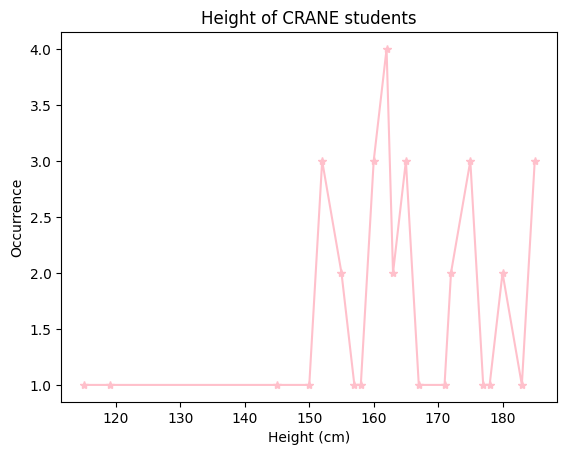

In [64]:
#Code here
data_columns = np.genfromtxt("Week 4 Height Poll Results.csv.csv", delimiter = ",")
print(data_columns.shape)

#Assign each column to a variable
height = data_columns[:,0]
occurrence = data_columns[:,1]

plt.plot(height, occurrence, color="pink", marker="*")
plt.xlabel("Height (cm)")
plt.ylabel("Occurrence")
plt.title("Height of CRANE students")
plt.show()

We can now see how common each height was. We want to learn more about the properties of this data, but how? Well, scientists like to fit their data to mathematical **models** (equations) that explain what is happening.

###**Step 2**: Before we fit a gaussian, we need to calculate a few important properties of the data: the mean, standard deviation, and the maximum amplitude. To do this, we just need three functions


    np.mean()     gives x0, center of the gaussian
    np.std()      gives w, half-width of the gaussian
    np.max()      gives a, height of the gaussian

Here is the visual again if you need it:
<p align="left">
  <img width="400" src="https://drive.google.com/uc?id=1ZHaEOhkdIMjo-Y8xeyRKFm2cIIzEEoaC">

</p>

Find these values and print them for our gaussian fit estimates.





In [82]:
#solution
mean = np.mean(height)
std = np.std(height)
maximum = np.max(occurrence)

print("The mean of height (x0) is: ", mean)
print("The standard deviation (w) of height is: ", std)
print("The maximum value of height (a) is: ", maximum)


The mean of height (x0) is:  161.38095238095238
The standard deviation (w) of height is:  18.043535157993084
The maximum value of height (a) is:  4.0


###**Step 3**: Apply `opt.curve_fit` to the function "gaussian" with your height and occurence data. Then for your initial guesses, you will use the values found for mean ($x0$), standard deviation ($w$), and amplitude ($a$). Print the bfpars that come out.

In [83]:
#solution here
bfpars, covar =  opt.curve_fit(gaussian, height, occurrence, p0=[mean, std, maximum]) #edit this

#print the results
print(bfpars)

[165.4438847   37.76443877   1.99256928]


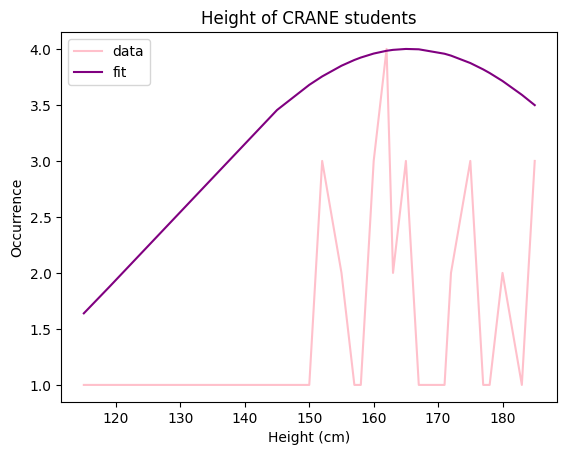

In [85]:
xvalues = height
yvalues = gaussian(height, bfpars[0], bfpars[1], 4) #The maximum is 4 but bfpars[2] is 2?????

plt.plot(height, occurrence, color="pink", label="data")
plt.xlabel("Height (cm)")
plt.ylabel("Occurrence")
plt.title("Height of CRANE students")
plt.plot(xvalues, yvalues, color="purple", label="fit")
plt.legend()
plt.show()

<br>

Congrats, you've done your first bit of science with Python! ✨


###Don't forget to do your final set of exercises in the Exercises.ipynb file. We will release a full set of solutions once Part 2 begins.

###Please stay after for a few minutes if you want to make plans with other students to work on the optional homework.

###Finally, consider taking a moment to fill out the feedback [form](https://forms.gle/ijXWyHom6Fnsj4N8A) about this lesson.